<a href="https://colab.research.google.com/github/SampadSikder/DP-Protocols/blob/main/UserLevelDatasetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import argparse
import math
import matplotlib.pyplot as plt

In [ ]:
import random
from multiprocessing import Pool
import numpy as np
import xxhash
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from dataclasses import dataclass
from typing import Literal, Dict, Any, List
from scipy.special import erfcinv

from tqdm import tqdm
import seaborn as sns


## Merge

In [ ]:
file_paths = [
    '/content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats_f1.csv',
    '/content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats_f2.csv',
    '/content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats_f3.csv',
    '/content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats_f4.csv',
]

# Read and merge all CSV files
dfs = []
for path in file_paths:
    df = pd.read_csv(path)
    dfs.append(df)
    print(f"Loaded {path}: {len(df)} rows")

# Concatenate all dataframes
merged_df = pd.concat(dfs, ignore_index=True)

print(f"\nTotal rows after merging: {len(merged_df)}")

# Save the merged dataframe
output_path = '/content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats-merged.csv'
merged_df.to_csv(output_path, index=False)

print(f"Merged file saved to: {output_path}")

Loaded /content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats_f1.csv: 1200000 rows
Loaded /content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats_f2.csv: 1200000 rows
Loaded /content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats_f3.csv: 1200000 rows
Loaded /content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats_f4.csv: 1200000 rows

Total rows after merging: 4800000
Merged file saved to: /content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats-merged.csv


In [ ]:
df_path = '/content/drive/MyDrive/Purdue Work/Datasets/user_level_dataset_diffstats-merged.csv'

In [ ]:
df = pd.read_csv(df_path)

In [ ]:
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"\nFirst few rows:")
print(df.head())

Total rows: 4800000
Total columns: 24

First few rows:
   num_ones  k_discrepancy  k_observed_frequency  k_theoretical_frequency  \
0     271.0       0.001984                0.0248                 0.026784   
1     252.0       0.000250                0.0068                 0.007050   
2     266.0       0.003059                0.0256                 0.022541   
3     262.0       0.002475                0.0204                 0.017925   
4     286.0       0.001888                0.0232                 0.021312   

   freq_ratio  is_anomalous_k  overlap_anomalous_items_count  \
0    0.925938             0.0                          271.0   
1    0.964594             0.0                          252.0   
2    1.135699             0.0                          266.0   
3    1.138089             0.0                          262.0   
4    1.088604             0.0                          286.0   

   overlap_anomalous_items_ratio  mean_item_freq_ratio  max_item_freq_ratio  \
0                 

In [ ]:
print(f"Columns: ")
print(df.columns)

Columns: 
Index(['num_ones', 'k_discrepancy', 'k_observed_frequency',
       'k_theoretical_frequency', 'freq_ratio', 'is_anomalous_k',
       'overlap_anomalous_items_count', 'overlap_anomalous_items_ratio',
       'mean_item_freq_ratio', 'max_item_freq_ratio', 'std_item_freq_ratio',
       'support_entropy', 'max_support_value', 'theoretical_probability_k',
       'log_likelihood', 'wasserstein_distance_k', 'js_divergence_k',
       'target_set_size', 'attacker_ratio', 'protocol', 'splits', 'epsilon',
       'dataset_type', 'label'],
      dtype='object')


In [ ]:
label_1_df = df[df['label'] == 1]
label_0_df = df[df['label'] == 0]

In [ ]:
print(f"Total rows: Attacked {len(label_1_df)}")
print(f"Total columns: Attacked {len(label_1_df.columns)}")
print(f"\nFirst few rows: Attacked")
print(label_1_df.head())

Total rows: Attacked 780000
Total columns: Attacked 24

First few rows: Attacked
      num_ones  k_discrepancy  k_observed_frequency  k_theoretical_frequency  \
4500     282.0       0.004636                0.0206                 0.025236   
4501     294.0       0.001653                0.0104                 0.012053   
4502     285.0       0.003394                0.0190                 0.022394   
4503     266.0       0.003059                0.0256                 0.022541   
4504     263.0       0.004873                0.0240                 0.019127   

      freq_ratio  is_anomalous_k  overlap_anomalous_items_count  \
4500    0.816295             1.0                          282.0   
4501    0.862836             0.0                          294.0   
4502    0.848433             1.0                          285.0   
4503    1.135699             0.0                          266.0   
4504    1.254742             1.0                          263.0   

      overlap_anomalous_items_ratio

In [ ]:
print(f"Total rows: Benign {len(label_0_df)}")
print(f"Total columns: Benign {len(label_0_df.columns)}")
print(f"\nFirst few rows: Benign")
print(label_1_df.head())

Total rows: Benign 1164000
Total columns: Benign 24

First few rows: Benign
      num_ones  k_discrepancy  k_observed_frequency  k_theoretical_frequency  \
4950     284.0       0.002618                0.0208                 0.023418   
4951     279.0       0.002015                0.0252                 0.027215   
4952     269.0       0.004021                0.0294                 0.025379   
4953     263.0       0.005273                0.0244                 0.019127   
4954     300.0       0.001433                0.0050                 0.006433   

      freq_ratio  is_anomalous_k  overlap_top_items_count  \
4950    0.888215             0.0                      9.0   
4951    0.925968             0.0                      7.0   
4952    1.158432             1.0                      5.0   
4953    1.275654             1.0                      8.0   
4954    0.777195             0.0                      6.0   

      overlap_top_items_ratio  mean_item_probability  low_prob_items_ratio  

## Correlation Matrix

Numerical columns: ['num_ones', 'k_discrepancy', 'k_observed_frequency', 'k_theoretical_frequency', 'freq_ratio', 'is_anomalous_k', 'overlap_anomalous_items_count', 'overlap_anomalous_items_ratio', 'mean_item_freq_ratio', 'max_item_freq_ratio', 'std_item_freq_ratio', 'support_entropy', 'max_support_value', 'theoretical_probability_k', 'log_likelihood', 'wasserstein_distance_k', 'js_divergence_k', 'target_set_size', 'attacker_ratio', 'splits', 'epsilon', 'label']


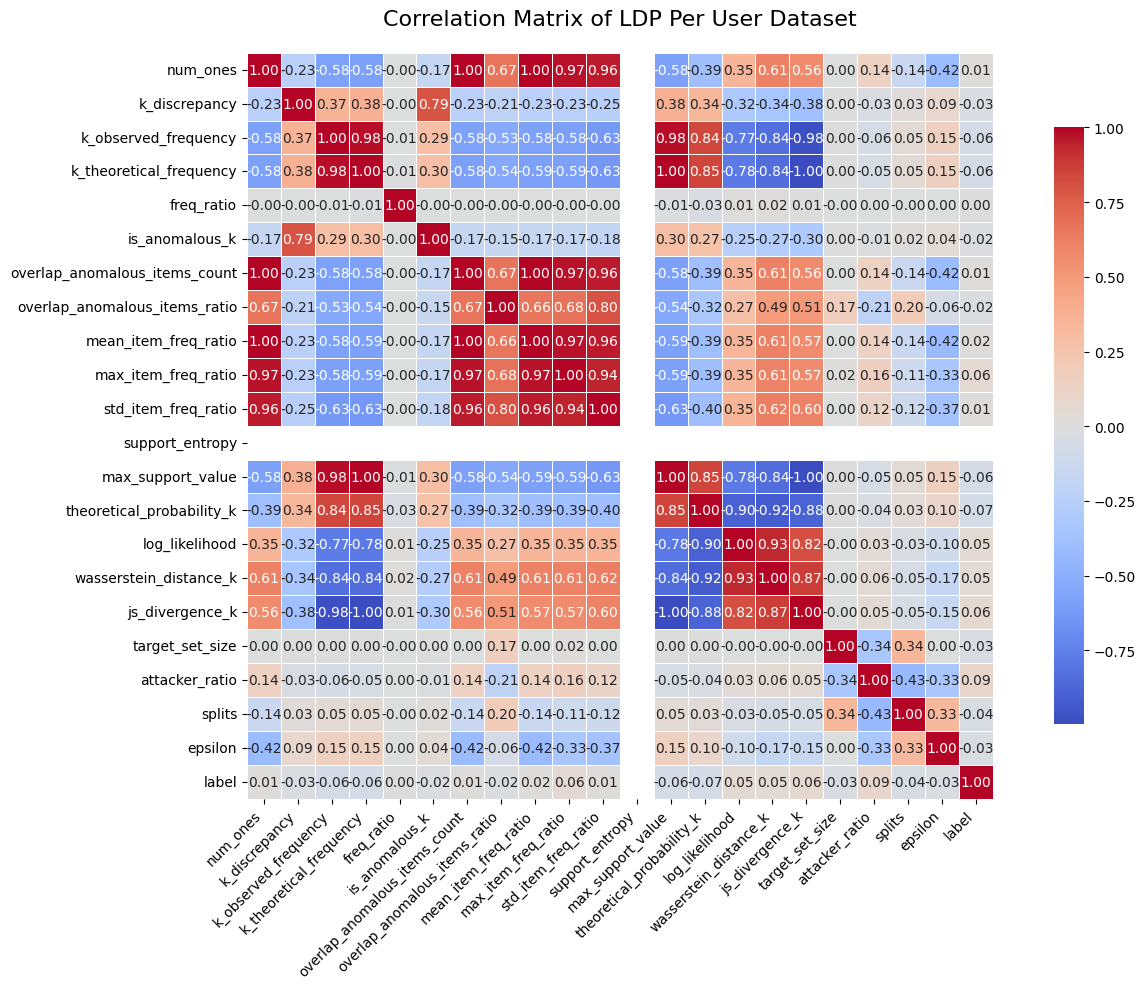

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is already loaded
# Select only numerical columns for correlation
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove 'label' if you want to see it separately, or keep it to see correlations with target
print(f"Numerical columns: {numerical_cols}")

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a larger figure for better readability
plt.figure(figsize=(14, 10))

# Create heatmap with better formatting
sns.heatmap(correlation_matrix,
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Color scheme
            fmt=".2f",            # Format to 2 decimal places
            center=0,             # Center colormap at 0
            square=True,          # Make cells square
            linewidths=0.5,       # Add gridlines
            cbar_kws={"shrink": 0.8})  # Adjust colorbar size

plt.title('Correlation Matrix of LDP Per User Dataset', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
columns_to_keep = [
    'num_ones', 'k_discrepancy', 'k_observed_frequency',
    'k_theoretical_frequency', 'freq_ratio', 'is_anomalous_k',
    'overlap_anomalous_items_count', 'overlap_anomalous_items_ratio',
    'mean_item_freq_ratio', 'max_item_freq_ratio', 'std_item_freq_ratio',
    'support_entropy', 'max_support_value',
    'theoretical_probability_k', 'log_likelihood',
    'wasserstein_distance_k', "js_divergence_k",
    'label'  # Keep the target variable
]

Filtered dataset shape: (4800000, 18)
Columns kept: ['num_ones', 'k_discrepancy', 'k_observed_frequency', 'k_theoretical_frequency', 'freq_ratio', 'is_anomalous_k', 'overlap_anomalous_items_count', 'overlap_anomalous_items_ratio', 'mean_item_freq_ratio', 'max_item_freq_ratio', 'std_item_freq_ratio', 'support_entropy', 'max_support_value', 'theoretical_probability_k', 'log_likelihood', 'wasserstein_distance_k', 'js_divergence_k', 'label']


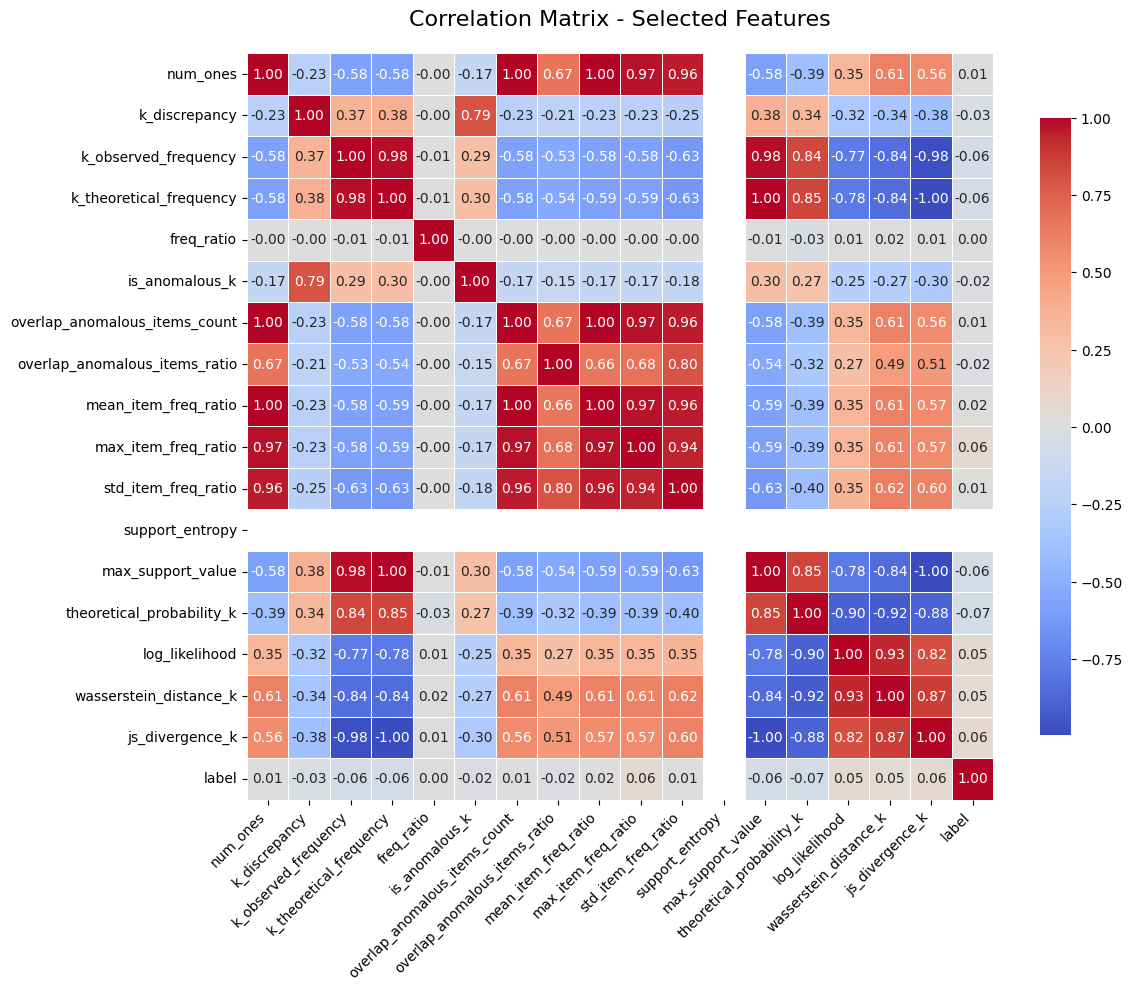

In [ ]:
df_filtered = df[columns_to_keep]

print(f"Filtered dataset shape: {df_filtered.shape}")
print(f"Columns kept: {df_filtered.columns.tolist()}")

# Calculate correlation matrix for filtered data
correlation_matrix = df_filtered.corr()

# Create heatmap
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Correlation Matrix - Selected Features', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Feature importance using RandomForest and XGBoost

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split

# X = df_filtered.drop('label', axis=1)
# y = df_filtered['label']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
# rf.fit(X_train, y_train)

# feature_importance = pd.DataFrame({
#     'feature': X.columns,
#     'importance': rf.feature_importances_
# }).sort_values('importance', ascending=False)

# print("Feature Importance from Random Forest:")
# print(feature_importance)

# # Plot feature importance
# plt.figure(figsize=(10, 6))
# sns.barplot(data=feature_importance, x='importance', y='feature')
# plt.title('Feature Importance (Random Forest)')
# plt.xlabel('Importance')
# plt.tight_layout()
# plt.show()

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X = df_filtered.drop('label', axis=1)
y = df_filtered['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost with reduced resource usage
xgb_model = xgb.XGBClassifier(
    n_estimators=50,          # Reduced from 100
    max_depth=4,              # Limit tree depth (default is 6)
    learning_rate=0.1,        # Default, can increase to 0.3 for faster training
    subsample=0.8,            # Use 80% of data per tree
    colsample_bytree=0.8,     # Use 80% of features per tree
    n_jobs=2,                 # Limit parallel threads (adjust based on your CPU)
    random_state=42,
    tree_method='hist',       # Faster histogram-based algorithm
    eval_metric='logloss'     # Suppress warning
)

xgb_model.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance from XGBoost:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

NameError: name 'df_filtered' is not defined

# Top Performing Features (High Importance):

- mean_item_freq_ratio (0.31) - By far the most important! This confirms that attackers concentrate on items that appear more frequently than expected in the attacked distribution.
- num_ones (0.22) - The k-value itself is highly discriminative. Attackers produce different k-value patterns than benign users.
overlap_anomalous_items_count (0.17) - How many anomalous items a user reports is a strong signal.
- max_item_freq_ratio (0.14) - The most suspicious item a user reported matters.
- std_item_freq_ratio (0.09) - Consistency in reporting anomalous items helps distinguish attackers.
- max_support_value (0.05) - Attackers concentrate their reports on fewer items.

# Model

## First lets specify the high importance to low importance features

In [ ]:
# high importance from XGBoost
HIGH_IMPORTANCE_FEATURES = [
    'mean_item_freq_ratio', 'num_ones', 'overlap_anomalous_items_count',
    'wasserstein_distance_k', 'js_divergence_k', 'max_item_freq_ratio',
    'std_item_freq_ratio'
]

# Combine all features for the DL model input
ALL_FEATURES = HIGH_IMPORTANCE_FEATURES + [
    'k_theoretical_frequency', 'k_observed_frequency', 'log_likelihood',
    'target_set_size', 'attacker_ratio', 'epsilon' # Configs included as context
]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class AttackerDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.FloatTensor(features)
        self.labels = torch.FloatTensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [ ]:
class RobustAttackerDetector(nn.Module):
    def __init__(self, input_dim, dropout_rate=0.3):
        super(RobustAttackerDetector, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.1),
            nn.Dropout(dropout_rate)
        )

        self.layer2 = nn.Sequential(
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.1),
            nn.Dropout(dropout_rate)
        )

        self.layer3 = nn.Sequential(
            nn.Linear(128, 64), nn.BatchNorm1d(64),
            nn.LeakyReLU(0.1), nn.Dropout(dropout_rate/2)
        )

        self.output = nn.Linear(64, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return self.output(x)

In [ ]:
def run_sensitivity_analysis(model, test_df, scaler, feature_cols, device='cpu', batch_size=2048):
    """
    Evaluates model using BATCH PROCESSING to prevent RAM overflow.
    """
    model.eval()
    results = []

    param_map = {
        'epsilon': 'Epsilon ($\\epsilon$)',
        'attacker_ratio': 'Attacker Ratio ($ \\beta$)',
        'target_set_size': 'Target Set Size ($r$)'
    }

    # --- RAM FIX: BATCH PREDICTION ---
    print(f"Predicting on {len(test_df)} samples using batch size {batch_size}...")

    X_raw = test_df[feature_cols].values
    all_probs = []

    # Process in chunks
    for i in range(0, len(X_raw), batch_size):
        # 1. Get batch
        batch_raw = X_raw[i : i + batch_size]

        # 2. Scale batch
        batch_scaled = scaler.transform(batch_raw)

        # 3. To Tensor (Only this small chunk goes to GPU/RAM)
        batch_tensor = torch.FloatTensor(batch_scaled).to(device)

        # 4. Predict
        with torch.no_grad():
            batch_out = torch.sigmoid(model(batch_tensor))
            # Move back to CPU immediately to free GPU/RAM
            all_probs.append(batch_out.cpu().numpy().flatten())

        # Optional: Delete tensor to force free memory
        del batch_tensor

    # Concatenate all batch results
    global_probs = np.concatenate(all_probs)
    global_preds = (global_probs > 0.5).astype(int)

    # Work on a copy to avoid SettingWithCopy warnings,
    # but keep it lightweight (only necessary columns)
    analysis_df = test_df.copy()
    analysis_df['predicted'] = global_preds

    # --- METRIC CALCULATION ---
    print("Calculating sensitivity metrics...")

    for col_name, display_name in param_map.items():
        if col_name not in analysis_df.columns:
            continue

        unique_vals = sorted(analysis_df[col_name].unique())

        for val in unique_vals:
            # Boolean indexing is faster and lighter than making new DF copies
            mask = analysis_df[col_name] == val

            # If mask is empty, skip
            if not mask.any():
                continue

            y_true = analysis_df.loc[mask, 'label'].values
            y_pred = analysis_df.loc[mask, 'predicted'].values

            # Calculate with zero_division protection
            acc = accuracy_score(y_true, y_pred)
            # precision/recall/f1 warn if no positive samples, zero_division handles it
            prec = precision_score(y_true, y_pred, zero_division=0)
            rec = recall_score(y_true, y_pred, zero_division=0)
            f1 = f1_score(y_true, y_pred, zero_division=0)

            results.append({
                'Parameter_Type': col_name,
                'Parameter_Label': display_name,
                'Value': val,
                'Accuracy': acc,
                'Precision': prec,
                'Recall': rec,
                'F1_Score': f1,
                'Count': mask.sum()
            })

    return pd.DataFrame(results)

In [ ]:
def plot_sensitivity_metric(sensitivity_df, metric='F1_Score'):
    """
    Plots the specific metric (F1_Score, Accuracy, Precision, or Recall).
    """
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.2)

    params = ['epsilon', 'attacker_ratio', 'target_set_size']
    labels = ['$\epsilon$', '$\\beta$', '$r$']

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    line_color = '#1f77b4'

    for i, param in enumerate(params):
        ax = axes[i]
        data = sensitivity_df[sensitivity_df['Parameter_Type'] == param]

        if len(data) == 0:
            ax.set_title(f"No data for {param}")
            continue

        ax.plot(data['Value'], data[metric],
                marker='X', markersize=8,
                linestyle='--', linewidth=2,
                color=line_color, label='Proposed DL Model')

        ax.set_xlabel(labels[i], fontsize=14, fontweight='bold')
        if i == 0:
            ax.set_ylabel(metric.replace('_', ' '), fontsize=14, fontweight='bold')

        ax.set_ylim(-0.05, 1.05)

        if param == 'target_set_size':
            ax.set_xticks(data['Value'].unique())

        ax.legend(loc='lower right')
        ax.grid(True, alpha=0.3)

    plt.suptitle(f"Impact of Parameters on {metric.replace('_', ' ')}", fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:9: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-369189821.py:9: SyntaxWarning: invalid escape sequence '\e'
  labels = ['$\epsilon$', '$\\beta$', '$r$']


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(df[ALL_FEATURES].values)
y_train = df['label'].values

In [ ]:
train_dataset = AttackerDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
# Setup Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Initialize Model
model = RobustAttackerDetector(len(ALL_FEATURES)).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_benign = (y_train == 0).sum()
num_attackers = (y_train == 1).sum()
ratio = num_benign / max(num_attackers, 1)
print(f"Class Imbalance Ratio: 1 Attacker : {ratio:.2f} Benign")


pos_weight = torch.tensor([ratio]).float().to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

# Train
print("Starting Training...")
model.train()
for epoch in range(5):
    for features, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        features = features.to(device)
        labels = labels.to(device).unsqueeze(1)

        optimizer.zero_grad()

        # Forward pass (Outputs logits)
        outputs = model(features)

        # Loss (BCEWithLogitsLoss handles the sigmoid internally)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

Using device: cpu
Class Imbalance Ratio: 1 Attacker : 5.15 Benign
Starting Training...


Epoch 5: 100%|██████████| 75000/75000 [07:22<00:00, 169.51it/s]



Running Sensitivity Analysis...
Predicting on 4800000 samples using batch size 4096...
Calculating sensitivity metrics...
Plotting results...


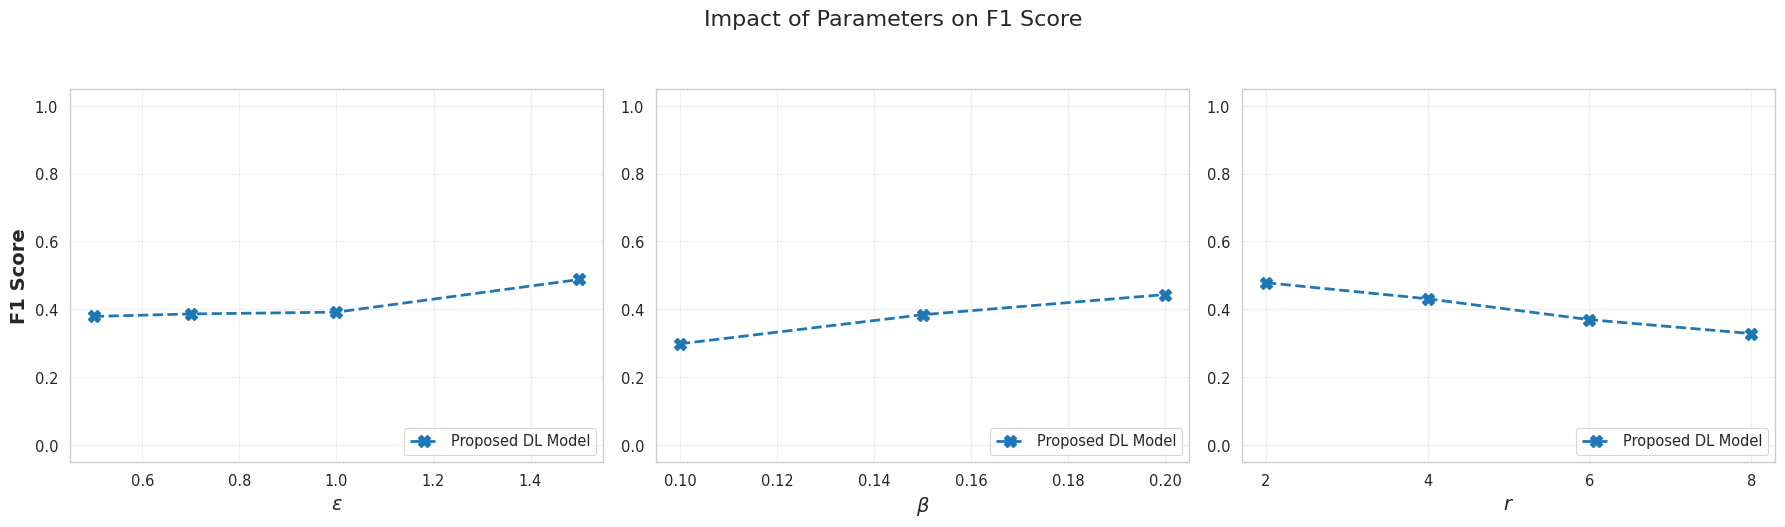

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nRunning Sensitivity Analysis...")
# Added batch_size parameter (adjust to 1024 or 512 if you still have issues)
sens_df = run_sensitivity_analysis(model, df, scaler, ALL_FEATURES, device, batch_size=4096)

print("Plotting results...")
plot_sensitivity_metric(sens_df, metric='F1_Score')